<a href="https://colab.research.google.com/github/balamurugan-palaniappan-CEP/AIML_CEP_2021/blob/main/Optimization_SVM_TA_Session_2021Dec18.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
#for the following statement to compile successfully, you need the scikit-learn package. 

from sklearn.datasets import load_iris #for loading iris dataset
from sklearn.svm import LinearSVC #linear svm from scikit learn 

np.random.seed(1000) #for reproducibility
iris = load_iris()
#check the shape of iris data features
print('iris data shape:', iris.data.shape)
A = iris.data
#check the shape of iris target labels
print('iris target shape:', iris.target.shape)
#We can print first 5 samples of iris data and check 
print('Features of first five samples of iris data:')
print(A[0:5])

iris data shape: (150, 4)
iris target shape: (150,)
Features of first five samples of iris data:
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


In [ ]:
#How many labels does iris data have? 
#print the unique classes
print('unique classes: ',np.unique(iris.target))
n = iris.data.shape[0] #Number of data points or samples 
d = iris.data.shape[1] #Dimension of data points

unique classes:  [0 1 2]


In [ ]:
#In the following code, we create a nx1 vector of target labels 
y = 1.0*np.ones([A.shape[0],1])
for i in range(iris.target.shape[0]):
    if iris.target[i] == 1:
        y[i] = 1
    else:
        y[i] = -1

In [ ]:
#Create an index array 
indexarr = np.arange(n) #index array
np.random.shuffle(indexarr) #shuffle the indices 
#print('shuffled indices of samples:')
#print(indexarr)

In [ ]:
#Use the samples corresponding to first 80% of indexarr for training 
num_train = int(0.8*n)
#Use the remaining 20% samples for testing 
num_test = n-num_train
print('num_train: ',num_train, 'num_test: ', num_test)

num_train:  120 num_test:  30


In [ ]:
#Use the first 80% of indexarr to create the train data features and train labels 
train_features = A[indexarr[0:num_train]]
train_label = y[indexarr[0:num_train]]
print('shape of train data features:')
print(train_features.shape)
print('shape of train data labels')
print(train_label.shape)

shape of train data features:
(120, 4)
shape of train data labels
(120, 1)


In [ ]:
#Use remaining 20% of indexarr to create the test data and test labels  
test_features = A[indexarr[num_train:n]]
test_label = y[indexarr[num_train:n]]
print('shape of test data features:')
print(test_features.shape)
print('shape of test data labels')
print(test_label.shape)

shape of test data features:
(30, 4)
shape of test data labels
(30, 1)


#SVM Optimization Problem

Given a training data set $D=\{(\mathbf{x}^i,y^i)\}_{i=1}^{n}$ of $n$ training samples where ${\mathbf{x}}^i \in \mathcal{X} \subset {\mathbb{R}}^d$ and $y^i \in \mathcal{Y}=\{+1,-1\}$, we solve the following optimization problem: 

$
\begin{align}
\min_{\mathbf{w}, b, \xi_i} & \ \frac{1}{2} \|\mathbf{w}\|_2^2 + C \sum_{i=1}^{n} \xi_i^2 \\ 
\text{s.t.}  & \ y^i (\mathbf{w}^\top {\mathbf{x}}^i + b) \geq 1 - \xi_i, \ \forall i \in \{1,2,\ldots,n\} \\   
& \ \xi_i \geq 0 \ \forall i \in \{1,2,\ldots,n\}. 
\end{align}
$

This problem can be equivalently written as:

$
\begin{align}
\min_{\mathbf{w}, b} & \ \frac{1}{2} \|\mathbf{w}\|_2^2 + C \sum_{i=1}^{n} (\max\{0,  1 - y^i (\mathbf{w}^\top {\mathbf{x}}^i + b)\})^2.\\ 
\end{align}
$



For simplicity we shall consider only the first two dimensions of the IRIS data and will not consider the bias term. Without the bias term the optimization problem would look as follows:

$
\begin{align}
\min_{\mathbf{w}} F(\mathbf{w}) = & \ \frac{1}{2} \|\mathbf{w}\|_2^2 + C \sum_{i=1}^{n} (\max\{0,  1 - y^i (\mathbf{w}^\top {\mathbf{x}}^i)\})^2.\\ 
\end{align}
$

The gradient with respect to $\mathbf{w}$ is given as: 

$
\begin{align}
\nabla_{\mathbf{w}} F(\mathbf{w}) = \mathbf{w} + C \sum_{i=1}^{n} 2(\max\{0,  1 - y^i (\mathbf{w}^\top {\mathbf{x}}^i)\})(-y^i {\mathbf{x}}^i)  
\end{align}
$

In [ ]:
train_features_new = train_features[:,0:2]
print(train_features_new.shape)
test_features_new = test_features[:,0:2]
print(test_features_new.shape)

(120, 2)
(30, 2)


In [ ]:
import math 

def obj_fn_SVM(X,y,C,w,b=0):
  num_train = X.shape[0]
  w_norm = np.linalg.norm(w)
  obj_fn_val = 0.5*w_norm**2
  loss = 0
  for i in range(num_train):
    loss_i = max(1-y[i]*(np.dot(w,X[i])+b),0)
    loss += loss_i**2
  obj_fn_val += C*loss
  return obj_fn_val

def backtracking_line_search_gd(X, y, C, w, grad_w, b=0, grad_b = 0, is_bias_used = False):
    max_backtrack = 100
    alpha = 1.
    rho = 0.5
    obj_fn_start = obj_fn_SVM(X,y,C,w,b) #compute objective function value at the starting point
    temp_w = np.subtract(w, alpha*grad_w) 
    if is_bias_used:
      temp_b = b -  alpha*grad_b 
    else: 
      temp_b = 0
    obj_fn_temp_w = obj_fn_SVM(X,y,C,temp_w,temp_b)
    num_backtrack = 0
    while (obj_fn_temp_w >= obj_fn_start):
      num_backtrack += 1
      alpha = rho*alpha  
      temp_w = np.subtract(w, alpha*grad_w) 
      if is_bias_used:
        temp_b = b -  alpha*grad_b 
      obj_fn_temp_w = obj_fn_SVM(X,y,C,temp_w,temp_b)
      #print ('withing backtrackls: old obj fn:', obj_fn_start, 'new obj fn:', obj_fn_temp_w)    
      if (num_backtrack > max_backtrack):
        break
    #print ('alpha:',alpha, 'old obj fn:', obj_fn_start, 'new obj fn:', obj_fn_temp_w)
    return alpha


def grad_descent_SVM(X, y, C=1, is_bias_used = False, tol=1e-3, verbose = True):
  num_train = X.shape[0]
  dim = X.shape[1]
  #Initialize weights 
  w = np.zeros(dim)
  b = 0

  grad_tol = tol
  step_length = 0.

  gd_iter = 0
  max_gd_iter = 100000 
  
  obj_fn_val_list = [] 
  
  while 1!=0:
    gd_iter += 1
    grad_w = np.copy(w)
    grad_b = 0
    for i in range(num_train):
      #compute gradient component for each example
      loss_i = max(1-y[i]*(np.dot(w,X[i])+b),0)
      grad_w_i = -2*C*loss_i*y[i]*X[i]
      grad_w = np.add(grad_w,grad_w_i)
      if is_bias_used:
        grad_b += -2*C*loss_i*y[i]

    
    grad_norm = np.sqrt(np.dot(grad_w,grad_w) + grad_b**2)
    obj_fn_val = obj_fn_SVM(X,y,C,w,b)
    obj_fn_val_list.append(obj_fn_val)
    if (verbose == True or  gd_iter%100 == 0):
      print('GD iter:', gd_iter, 'step length:', step_length, 'obj fn val:', obj_fn_val, 'grad norm:', grad_norm)
    
    if grad_norm < grad_tol:
      print('Gradient norm:', grad_norm, ' less than tol:', grad_tol, ' Exiting...!')
      break

    #compute step length
    step_length = backtracking_line_search_gd(X, y, C, w, grad_w, b, grad_b, is_bias_used)
    #update weights 
    w = np.subtract(w, np.multiply(step_length, grad_w))
    if is_bias_used:
      b = b - step_length*grad_b

    if gd_iter > max_gd_iter:
      print('MAX ITERATIONS ',max_gd_iter, ' REACHED.. EXITING..!')
      break
  return obj_fn_val_list  


def mini_batch_SGD_SVM(X, y, C=1, batch_size=32,  is_bias_used = False, max_epochs = 70, verbose=True):
  num_train = X.shape[0]
  dim = X.shape[1]
  #Initialize weights 
  w = np.zeros(dim)
  b = 0

  
  step_length = 0.

  msgd_epoch = 0
  max_msgd_epochs = max_epochs 
  msgd_batches = 0

  obj_fn_val_list = [] 
  idx_arr = np.array(range(num_train))
  num_batches = math.ceil(num_train/batch_size)

  while msgd_epoch < max_msgd_epochs:
    msgd_epoch += 1

    #shuffle
    np.random.shuffle(idx_arr)
        
    for batch in range(num_batches):
      msgd_batches += 1
      grad_w = np.copy(w)
      grad_b = 0
      #extract batch 
      start_idx = batch*batch_size
      end_idx = min(num_train,(batch+1)*batch_size)
      for i in np.arange(start_idx, end_idx):
        #compute gradient component for each example
        loss_i = max(1-y[idx_arr[i]]*(np.dot(w,X[idx_arr[i]])+b),0)
        grad_w_i = -2*C*loss_i*y[idx_arr[i]]*X[idx_arr[i]]
        grad_w = np.add(grad_w,grad_w_i)
        if is_bias_used:
          grad_b += -2*C*loss_i*y[idx_arr[i]]
      obj_fn_val = obj_fn_SVM(X,y,C,w,b)
      obj_fn_val_list.append(obj_fn_val)
      if (verbose == True or  msgd_epoch%10 == 0):
        print('Epoch:', msgd_epoch, 'batch:', batch, 'step length:', step_length, 'obj fn val:', obj_fn_val)

      #update weights 
      step_length = 0.01/(msgd_epoch+1)
      
      w = np.subtract(w, np.multiply(step_length, grad_w))
      if is_bias_used:
        b = b - step_length*grad_b
  
  return obj_fn_val_list  


In [ ]:
C = 0.1
obj_fn_vals = grad_descent_SVM(train_features_new, train_label,C)

GD iter: 1 step length: 0.0 obj fn val: [12.] grad norm: 60.30928618380425
GD iter: 2 step length: 0.0009765625 obj fn val: [10.28723879] grad norm: 4.793016599057074
GD iter: 3 step length: 0.00390625 obj fn val: [10.24690255] grad norm: 8.678703062254225
GD iter: 4 step length: 0.001953125 obj fn val: [10.22077271] grad norm: 9.209276639950504
GD iter: 5 step length: 0.001953125 obj fn val: [10.19645263] grad norm: 9.798359222468179
GD iter: 6 step length: 0.001953125 obj fn val: [10.17404237] grad norm: 10.449654543727437
GD iter: 7 step length: 0.001953125 obj fn val: [10.15366565] grad norm: 11.167153244852216
GD iter: 8 step length: 0.001953125 obj fn val: [10.13547356] grad norm: 11.955178489874646
GD iter: 9 step length: 0.001953125 obj fn val: [10.11964903] grad norm: 12.818430792295292
GD iter: 10 step length: 0.001953125 obj fn val: [10.10641193] grad norm: 13.762032095457952
GD iter: 11 step length: 0.001953125 obj fn val: [10.09602513] grad norm: 14.791569444538098
GD iter

In [ ]:
msgd_obj_fn_vals = mini_batch_SGD_SVM(train_features_new, train_label,C)

Epoch: 1 batch: 0 step length: 0.0 obj fn val: [12.]
Epoch: 1 batch: 1 step length: 0.005 obj fn val: [12.49681168]
Epoch: 1 batch: 2 step length: 0.005 obj fn val: [22.35726404]
Epoch: 1 batch: 3 step length: 0.005 obj fn val: [14.58091666]
Epoch: 2 batch: 0 step length: 0.005 obj fn val: [12.03070995]
Epoch: 2 batch: 1 step length: 0.0033333333333333335 obj fn val: [10.64068855]
Epoch: 2 batch: 2 step length: 0.0033333333333333335 obj fn val: [10.28746777]
Epoch: 2 batch: 3 step length: 0.0033333333333333335 obj fn val: [10.56313433]
Epoch: 3 batch: 0 step length: 0.0033333333333333335 obj fn val: [10.17432847]
Epoch: 3 batch: 1 step length: 0.0025 obj fn val: [10.50380154]
Epoch: 3 batch: 2 step length: 0.0025 obj fn val: [10.15559671]
Epoch: 3 batch: 3 step length: 0.0025 obj fn val: [10.23931302]
Epoch: 4 batch: 0 step length: 0.0025 obj fn val: [10.17571621]
Epoch: 4 batch: 1 step length: 0.002 obj fn val: [10.14777831]
Epoch: 4 batch: 2 step length: 0.002 obj fn val: [10.1312264

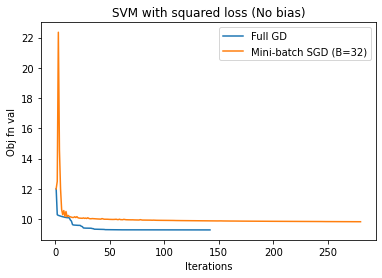

In [ ]:
import matplotlib.pyplot as plt 
fig,ax = plt.subplots(1,1)
ax.plot(np.arange(1,len(obj_fn_vals)+1),obj_fn_vals)
ax.plot(np.arange(1,len(msgd_obj_fn_vals)+1),msgd_obj_fn_vals)
ax.set_xlabel('Iterations')
ax.set_ylabel('Obj fn val')
ax.legend(['Full GD','Mini-batch SGD (B=32)'])
ax.set_title('SVM with squared loss (No bias)')
plt.show()


#Now let us consider the bias term 

Here the objective function would be as follows:

$
\begin{align}
\min_{\mathbf{w},b} F(\mathbf{w},b) = & \ \frac{1}{2} \|\mathbf{w}\|_2^2 + C \sum_{i=1}^{n} (\max\{0,  1 - y^i (\mathbf{w}^\top {\mathbf{x}}^i+b)\})^2.\\ 
\end{align}
$

The gradient with respect to $\mathbf{w}$ is given as: 

$
\begin{align}
\nabla_{\mathbf{w}} F(\mathbf{w},b) = \mathbf{w} + C \sum_{i=1}^{n} 2(\max\{0,  1 - y^i (\mathbf{w}^\top {\mathbf{x}}^i+b)\})(-y^i {\mathbf{x}}^i)  
\end{align}
$

and the gradient with respect to bias $b$ is given as:

$
\begin{align}
\nabla_{b} F(\mathbf{w},b) =  C \sum_{i=1}^{n} 2(\max\{0,  1 - y^i (\mathbf{w}^\top {\mathbf{x}}^i+b)\})(-y^i).  
\end{align}
$


In [ ]:
C = 0.1
obj_fn_vals = grad_descent_SVM(train_features_new, train_label,C, is_bias_used=True, tol=1e-2, verbose=False)

GD iter: 100 step length: 0.0009765625 obj fn val: [9.15986031] grad norm: [0.51513327]
GD iter: 200 step length: 0.03125 obj fn val: [8.94958943] grad norm: [3.03830709]
GD iter: 300 step length: 0.0009765625 obj fn val: [8.81840835] grad norm: [0.30139316]
GD iter: 400 step length: 0.0009765625 obj fn val: [8.74060431] grad norm: [0.22832463]
GD iter: 500 step length: 0.015625 obj fn val: [8.69970892] grad norm: [0.75172647]
GD iter: 600 step length: 0.0009765625 obj fn val: [8.67766528] grad norm: [0.14631548]
GD iter: 700 step length: 0.03125 obj fn val: [8.66338213] grad norm: [0.8215416]
GD iter: 800 step length: 0.03125 obj fn val: [8.65391598] grad norm: [0.60416546]
GD iter: 900 step length: 0.0009765625 obj fn val: [8.64755055] grad norm: [0.07772012]
GD iter: 1000 step length: 0.001953125 obj fn val: [8.6433562] grad norm: [0.32755621]
GD iter: 1100 step length: 0.001953125 obj fn val: [8.64055166] grad norm: [0.24151774]
GD iter: 1200 step length: 0.001953125 obj fn val: [8

In [ ]:
msgd_obj_fn_vals = mini_batch_SGD_SVM(train_features_new, train_label,C, batch_size = 48, is_bias_used=True, max_epochs =300, verbose=False)

Epoch: 10 batch: 0 step length: 0.001 obj fn val: [10.01917827]
Epoch: 10 batch: 1 step length: 0.0009090909090909091 obj fn val: [10.03977223]
Epoch: 10 batch: 2 step length: 0.0009090909090909091 obj fn val: [10.01083742]
Epoch: 20 batch: 0 step length: 0.0005 obj fn val: [9.93956568]
Epoch: 20 batch: 1 step length: 0.0004761904761904762 obj fn val: [9.93669934]
Epoch: 20 batch: 2 step length: 0.0004761904761904762 obj fn val: [9.9384139]
Epoch: 30 batch: 0 step length: 0.0003333333333333333 obj fn val: [9.89928276]
Epoch: 30 batch: 1 step length: 0.0003225806451612903 obj fn val: [9.90008361]
Epoch: 30 batch: 2 step length: 0.0003225806451612903 obj fn val: [9.89669433]
Epoch: 40 batch: 0 step length: 0.00025 obj fn val: [9.87204523]
Epoch: 40 batch: 1 step length: 0.00024390243902439024 obj fn val: [9.87186815]
Epoch: 40 batch: 2 step length: 0.00024390243902439024 obj fn val: [9.87068553]
Epoch: 50 batch: 0 step length: 0.0002 obj fn val: [9.85183658]
Epoch: 50 batch: 1 step lengt

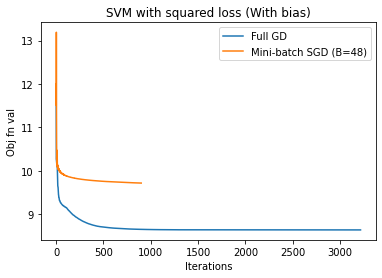

In [ ]:
import matplotlib.pyplot as plt 
fig,ax = plt.subplots(1,1)
ax.plot(np.arange(1,len(obj_fn_vals)+1),obj_fn_vals)
ax.plot(np.arange(1,len(msgd_obj_fn_vals)+1),msgd_obj_fn_vals)
ax.set_xlabel('Iterations')
ax.set_ylabel('Obj fn val')
ax.legend(['Full GD','Mini-batch SGD (B=48)'])
ax.set_title('SVM with squared loss (With bias)')
plt.show()
